In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
housing=pd.read_csv("C:\\Users\\matas\\Desktop\\HousingPrices-Amsterdam-August-2021.csv")

In [4]:
housing.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [5]:
housing['Zip'].unique()

array(['1091 CR', '1059 EL', '1097 SM', '1060 TH', '1036 KN', '1051 AM',
       '1033 KM', '1053 WL', '1058 DG', '1073 TM', '1058 HN', '1019 LD',
       '1091 CK', '1017 AD', '1091 CT', '1036 KE', '1058 VP', '1064 CP',
       '1102 SX', '1013 WJ', '1016 DP', '1072 JK', '1062 BS', '1095 JX',
       '1034 LH', '1035 HG', '1083 GP', '1056 JJ', '1065 BG', '1072 HN',
       '1078 DE', '1013 EC', '1076 JP', '1054 GJ', '1053 DS', '1083 TL',
       '1073 GJ', '1054 TL', '1018 NB', '1019 JX', '1056 TD', '1053 XP',
       '1106 DM', '1018 VS', '1093 TE', '1056 NZ', '1095 BN', '1104 VA',
       '1064 WX', '1024 BG', '1062 JS', '1068 JC', '1013 DR', '1017 HH',
       '1034 BM', '1075 XR', '1035 PE', '1011 PT', '1055 GW', '1095 AN',
       '1024 VE', '1056 XJ', '1058 XZ', '1078 EZ', '1054 KJ', '1024 HM',
       '1055 KE', '1095 MD', '1097 NR', '1094 EB', '1107 PW', '1033 HR',
       '1055 GG', '1017 VV', '1067 JG', '1025 HE', '1072 KA', '1107 DK',
       '1052 TR', '1095 RZ', '1057 RX', '1017 VX', 

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


In [7]:
# Count total NaNs in the entire DataFrame
total_nans = housing['Price'].isnull().sum().sum()
print(f"Total NaNs in the DataFrame: {total_nans}")


Total NaNs in the DataFrame: 4


In [8]:
housing.describe()

,Unnamed: 0,Price,Area,Room,Lon,Lat
count,924.000000,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,462.500000,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,266.880123,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.000000,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,462.500000,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,693.250000,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,924.000000,5.950000e+06,623.000000,14.000000,5.029122,52.423805


In [9]:
housing['Price'].value_counts(ascending=True)

Price
999500.0      1
519900.0      1
2650000.0     1
1149000.0     1
3680000.0     1
             ..
425000.0     31
300000.0     32
350000.0     38
325000.0     39
375000.0     43
Name: count, Length: 226, dtype: int64

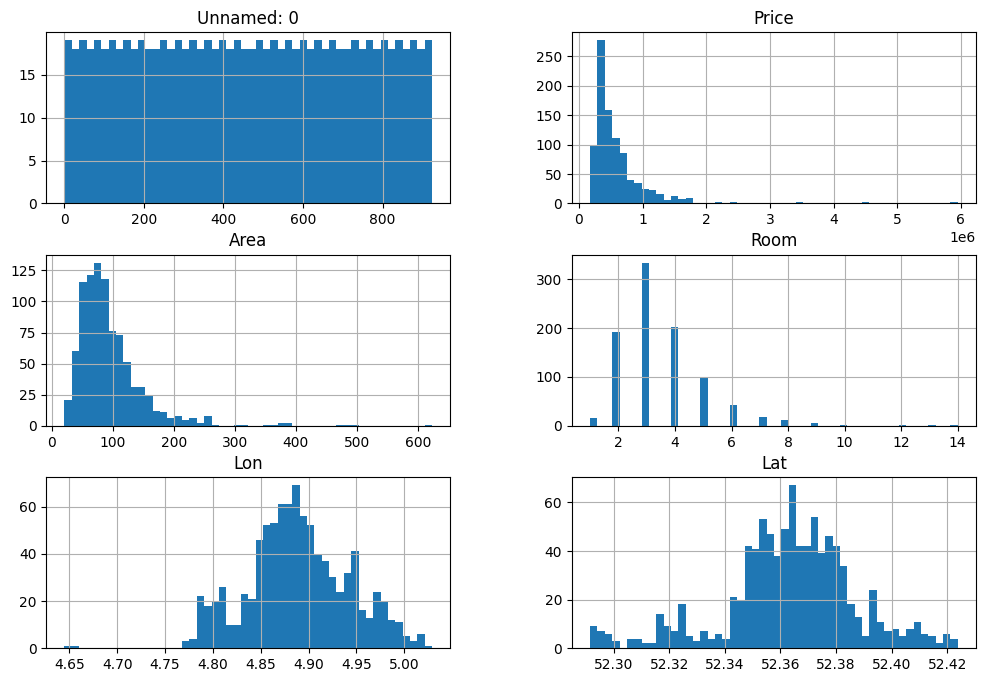

In [10]:
housing.hist(bins=50,figsize=(12,8))
plt.show()

In [11]:
housing.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
919    0
920    0
921    0
922    0
923    0
Length: 924, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing, test_size=0.2,random_state=42)

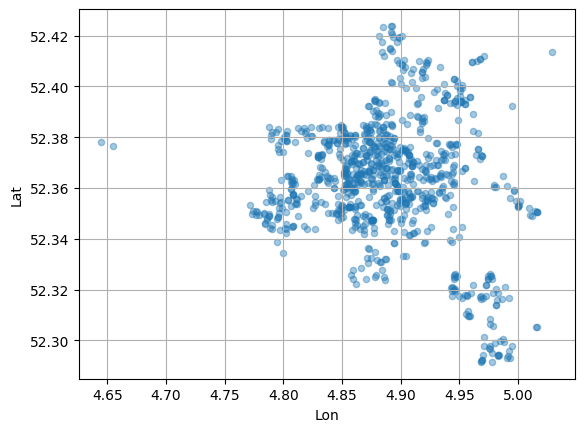

In [13]:
housing.plot(kind='scatter',x='Lon',y='Lat',grid=True,alpha=0.4)
plt.show()

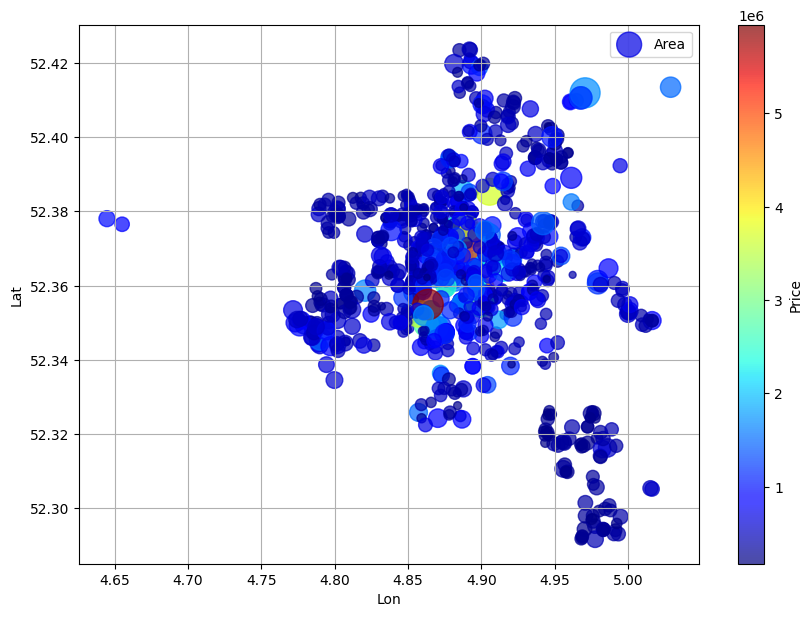

In [14]:
housing.plot(kind='scatter',x='Lon',y='Lat',grid=True,s=housing['Area'],label='Area',c='Price',cmap='jet',
             colorbar=True,legend=True,sharex=False,figsize=(10,7),alpha=0.7)
plt.show()

In [15]:
def categorize_zip(zip_code):  # Use a different parameter name instead of 'zip'
    num_part = int(zip_code[:4])  # Cast to string if needed, e.g., str(zip_code)[:4]

    if 1000 <= num_part <= 1019:
        return 'Amsterdam-Centrum'
    elif 1020 <= num_part <= 1039:
        return 'Amsterdam-Noord'
    elif 1040 <= num_part <= 1059:
        return 'Amsterdam-West'
    elif 1060 <= num_part <= 1079:
        return 'Amsterdam Nieuw-West'
    elif 1080 <= num_part <= 1099:
        return 'Amsterdam-Zuid'
    elif 1100 <= num_part <= 1119:
        return 'Amsterdam Zuidoost'
    else:
        return 'Other'

# Apply the function to the 'Zip' column of your dataframe
housing['district'] = housing['Zip'].apply(categorize_zip)


In [16]:
housing.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat,district
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,Amsterdam-Zuid
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,Amsterdam-West
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,Amsterdam-Zuid
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,Amsterdam Nieuw-West
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,Amsterdam-Noord


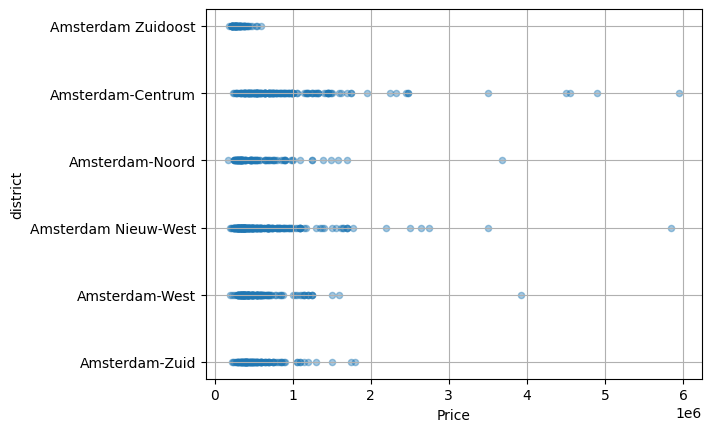

In [17]:
housing.plot(kind='scatter',x='Price',y='district',grid=True,alpha=0.4)
plt.show()

In [18]:
housing.drop('Zip', axis=1, inplace=True)

In [19]:
housing.head()

,Unnamed: 0,Address,Price,Area,Room,Lon,Lat,district
0,1,"Blasiusstraat 8 2, Amsterdam",685000.0,64,3,4.907736,52.356157,Amsterdam-Zuid
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",475000.0,60,3,4.850476,52.348586,Amsterdam-West
2,3,"Zaaiersweg 11 A, Amsterdam",850000.0,109,4,4.944774,52.343782,Amsterdam-Zuid
3,4,"Tenerifestraat 40, Amsterdam",580000.0,128,6,4.789928,52.343712,Amsterdam Nieuw-West
4,5,"Winterjanpad 21, Amsterdam",720000.0,138,5,4.902503,52.410538,Amsterdam-Noord


In [20]:
housing.drop('Address', axis=1, inplace=True)

In [21]:
housing.head()

,Unnamed: 0,Price,Area,Room,Lon,Lat,district
0,1,685000.0,64,3,4.907736,52.356157,Amsterdam-Zuid
1,2,475000.0,60,3,4.850476,52.348586,Amsterdam-West
2,3,850000.0,109,4,4.944774,52.343782,Amsterdam-Zuid
3,4,580000.0,128,6,4.789928,52.343712,Amsterdam Nieuw-West
4,5,720000.0,138,5,4.902503,52.410538,Amsterdam-Noord


In [22]:
housing.drop('Unnamed: 0', axis=1, inplace=True)

In [23]:
housing.head()

,Price,Area,Room,Lon,Lat,district
0,685000.0,64,3,4.907736,52.356157,Amsterdam-Zuid
1,475000.0,60,3,4.850476,52.348586,Amsterdam-West
2,850000.0,109,4,4.944774,52.343782,Amsterdam-Zuid
3,580000.0,128,6,4.789928,52.343712,Amsterdam Nieuw-West
4,720000.0,138,5,4.902503,52.410538,Amsterdam-Noord


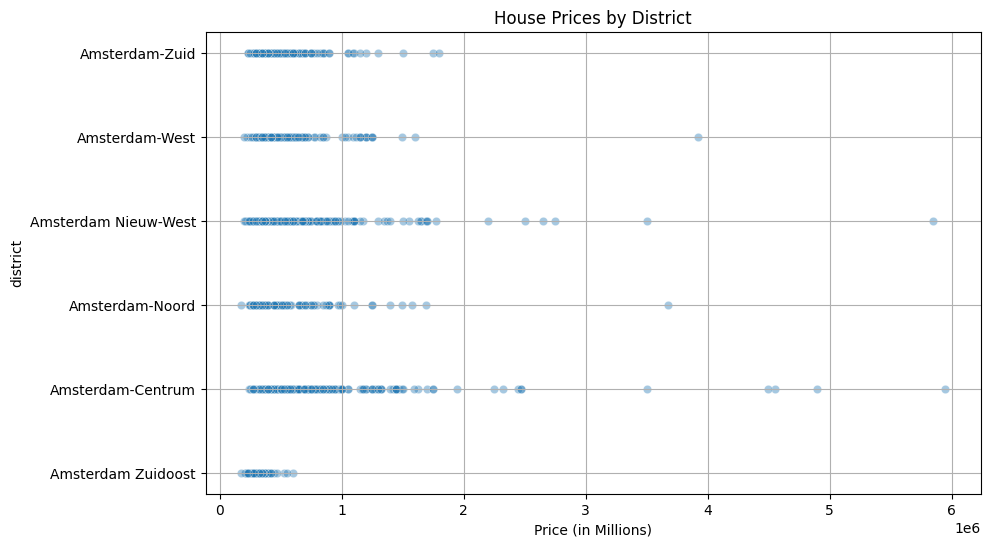

In [24]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=housing, x='Price', y='district', alpha=0.4)
plt.grid(True)
plt.title('House Prices by District')
plt.xlabel('Price (in Millions)')
plt.ylabel('district')
plt.show()


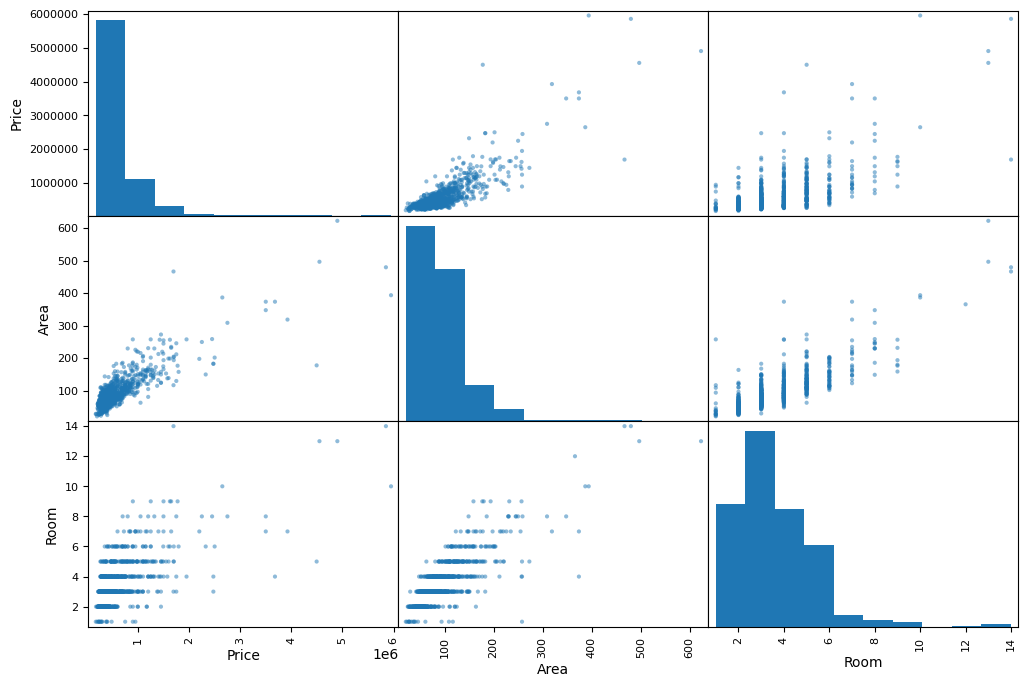

In [25]:
from pandas.plotting import scatter_matrix

att=['Price','Area','Room']
scatter_matrix(housing[att],figsize=(12,8))
plt.show()


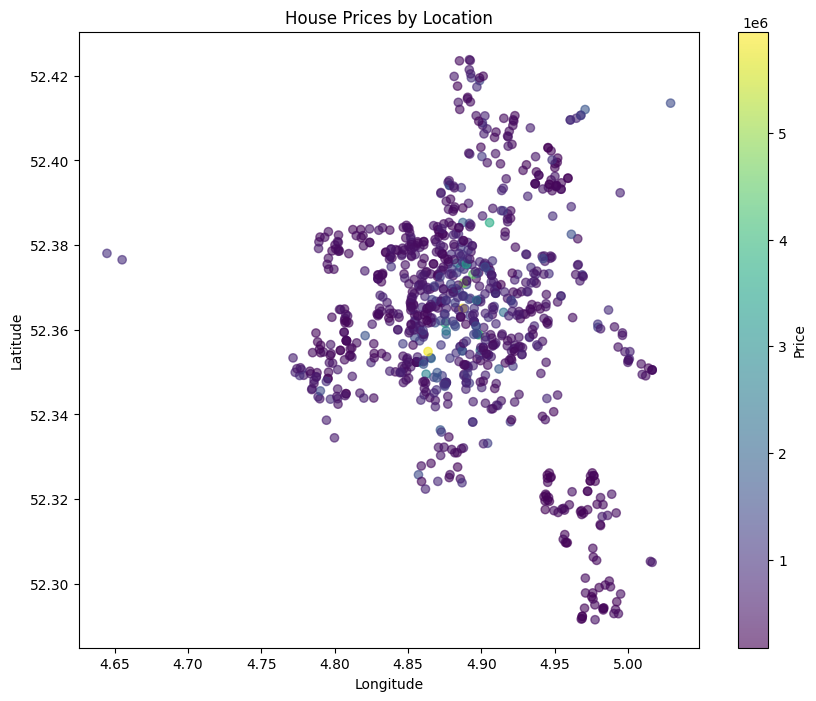

In [26]:
plt.figure(figsize=(10, 8))
plt.scatter(housing['Lon'], housing['Lat'], c=housing['Price'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Prices by Location')
plt.show()

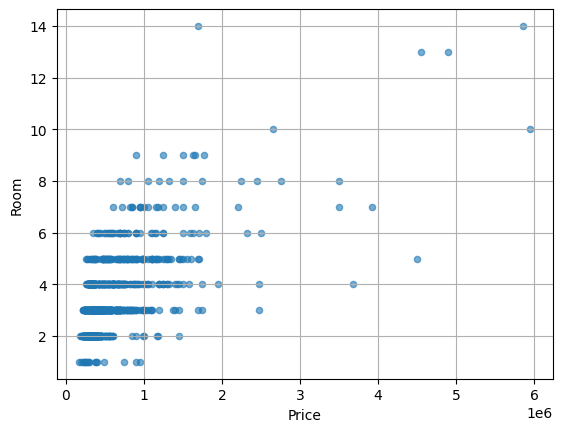

In [27]:
housing.plot(kind='scatter',x='Price',y='Room',alpha=0.6,grid=True)
plt.show()

In [28]:
housing['Area_per_Room'] = housing['Area'] / housing['Room']

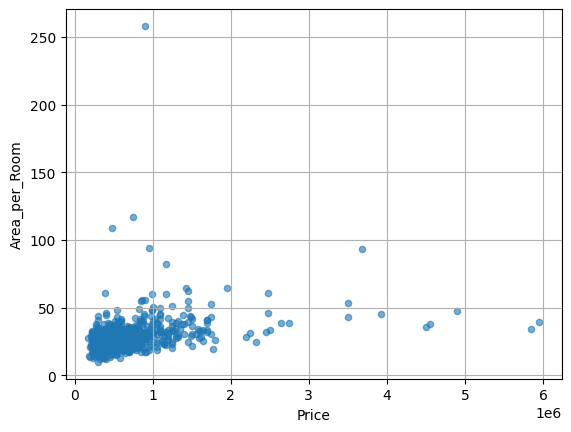

In [29]:
housing.plot(kind='scatter',x='Price',y='Area_per_Room',alpha=0.6,grid=True)
plt.show()

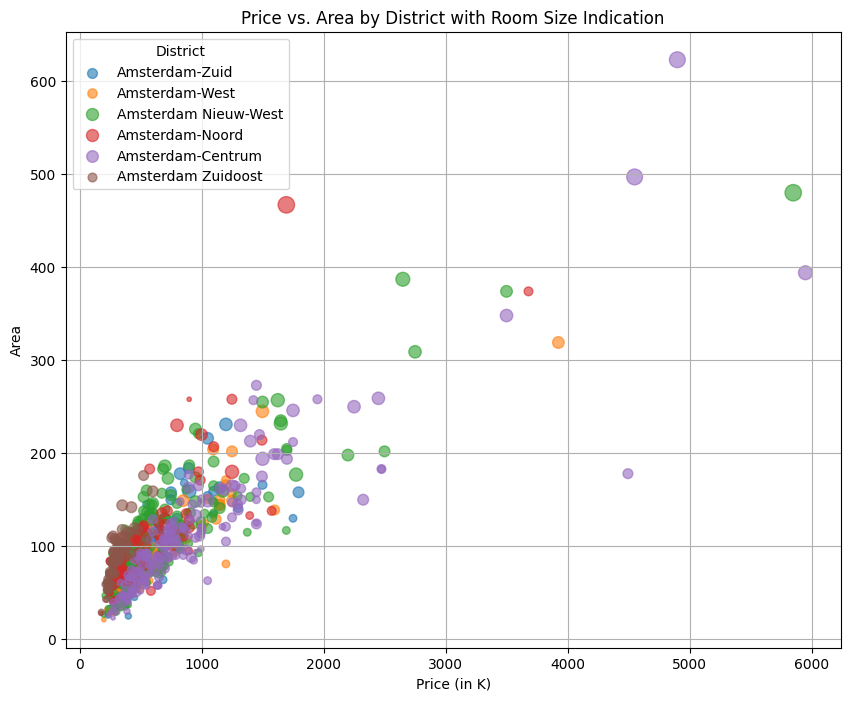

In [30]:
plt.figure(figsize=(10, 8))

# Loop through each unique district and plot it on the same axes
for district in housing['district'].unique():
    # Select the data for the current district
    district_data = housing[housing['district'] == district]
    
    # Plot the data, with the size of each point determined by the 'Room' column
    plt.scatter(district_data['Price'] / 1000,  # Price in 'thousands'
                district_data['Area'],
                s=district_data['Room'] * 10,  # Point size determined by 'Room'
                alpha=0.6, 
                label=district)

# Set the plot title and labels
plt.title('Price vs. Area by District with Room Size Indication')
plt.xlabel('Price (in K)')
plt.ylabel('Area')
plt.legend(title='District')
plt.grid(True)

# Show the plot
plt.show()

In [31]:
from sklearn.impute import SimpleImputer

# Create the imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Assuming 'Price' is the column with missing values
# Reshape is needed because we are only passing a single column
housing['Price'] = imputer.fit_transform(housing['Price'].values.reshape(-1, 1))

# Now 'Price' has no missing values, and they've been replaced with the median of the column


In [32]:
# Fit the imputer on the training set
imputer.fit(train_set[['Price']])

# Transform both training and test sets
train_set['Price'] = imputer.transform(train_set[['Price']])
test_set['Price'] = imputer.transform(test_set[['Price']])


In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
housing_cat=housing[['district']]
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)


In [35]:
housing_cat_1hot

<924x6 sparse matrix of type '<class 'numpy.float64'>'
	with 924 stored elements in Compressed Sparse Row format>

In [36]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.]])

In [37]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.]])

In [38]:
cat_encoder.categories_

[array(['Amsterdam Nieuw-West', 'Amsterdam Zuidoost', 'Amsterdam-Centrum',
        'Amsterdam-Noord', 'Amsterdam-West', 'Amsterdam-Zuid'],
       dtype=object)]

In [39]:
df_test = pd.DataFrame({"district": ["Amsterdam Nieuw-West", "Amsterdam Zuidoost"]})
pd.get_dummies(df_test)

,district_Amsterdam Nieuw-West,district_Amsterdam Zuidoost
0,True,False
1,False,True


In [40]:
cat_encoder.transform(df_test)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [41]:
df_test_unknown = pd.DataFrame({"district": ["Amsterdam-Centrum", "Amsterdam-Noord"]})
pd.get_dummies(df_test)

,district_Amsterdam Nieuw-West,district_Amsterdam Zuidoost
0,True,False
1,False,True


In [42]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [43]:
cat_encoder.get_feature_names_out()

array(['district_Amsterdam Nieuw-West', 'district_Amsterdam Zuidoost',
       'district_Amsterdam-Centrum', 'district_Amsterdam-Noord',
       'district_Amsterdam-West', 'district_Amsterdam-Zuid'], dtype=object)

In [44]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [45]:
df_output

,district_Amsterdam Nieuw-West,district_Amsterdam Zuidoost,district_Amsterdam-Centrum,district_Amsterdam-Noord,district_Amsterdam-West,district_Amsterdam-Zuid
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
test_set[['Price','Area','Rooms']]=scaler.fit_transform(test_set[['Price','Area','Room']])

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Split your data into features and target
X = housing.drop('Price', axis=1)
y = housing['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define which columns should be scaled and which should be one-hot encoded
numeric_features = ['Area', 'Room']  
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute before scaling
    ('scaler', StandardScaler())
])

categorical_features = ['district']  # Replace with your categorical feature names
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create the preprocessing engine
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline with your data
model_pipeline.fit(X_train, y_train)

# Now you can predict using the pipeline
predictions = model_pipeline.predict(X_test)


In [50]:
predictions

array([ 523881.25524574,  520992.59917229,  606159.19131777,
       3262048.05595239,  661896.50625154,  682620.53306259,
        350370.65785183,  366481.29918544,  445597.28127796,
        389210.03661034,  704119.83688506,  346951.70540452,
        485873.88461198,  575398.11596812,  122155.02100338,
       1124225.94516129,  357904.45796441, 1227750.68079961,
        387228.30873854, 1163144.70571326,  959479.00853516,
        690154.33317517,  951888.05025648,  155446.64162418,
       1264063.82839005, 1851973.82788711,  864473.95595177,
        775865.42861693,  562914.97716961,  233632.71277299,
        415937.47729534, 1221805.49718424,  445597.28127796,
        275206.11367266,  332278.28864643,  281964.63677381,
       1417114.92105932,  280239.90736982,  479800.29181697,
        340333.60931323,  510039.8466124 ,  445052.77798169,
       1022404.20838593,  810648.18996874,  469218.7399821 ,
        292001.68531241,  501984.52594559,  839635.08147545,
        486626.17888136,

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
predictions = model_pipeline.predict(X_test)

# Calculate MAE, MSE, and R²
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r_squared}")


Mean Absolute Error (MAE): 160830.58935506747
Mean Squared Error (MSE): 91580174094.93423
R-squared (R²): 0.8177760929224386
